In [4]:
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

In [5]:
def pred_laser(image, kernel_size):
    response = cv2.medianBlur(image, kernel_size)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(response)
    return max_loc

def target_laser(image):
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(image)
    return max_loc

def distance(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

# Laser Location From Heat Maps

Brightest region center: (2144, 1215) Region sum: 184.0


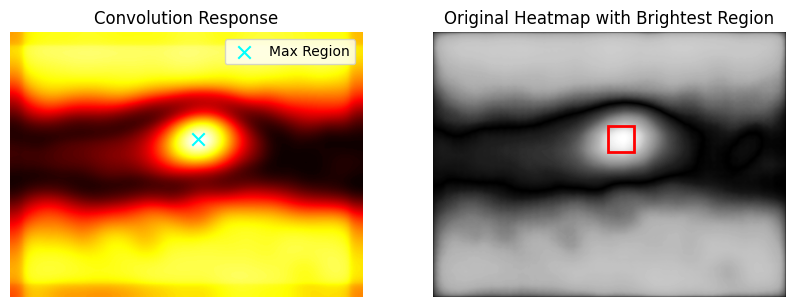

In [16]:
# Visualize heat map, kernel, and laser location
image = cv2.imread('pres/0a1ac207c02f37bbf6f4aaa8e53fb6d7.png', cv2.IMREAD_GRAYSCALE)
inverted = 255 - image

# Kernels for experimentation
kernel_size = 300
kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
# response = cv2.boxFilter(inverted, ddepth=-1, ksize=(kernel_size, kernel_size), normalize=True)
response = cv2.filter2D(inverted, ddepth=-1, kernel=kernel)
# response = cv2.medianBlur(inverted, kernel_size)
# response = inverted.astype(np.float32)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(response)
print("Brightest region center:", max_loc, "Region sum:", max_val)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Convolution Response")
plt.imshow(response, cmap='hot')
plt.scatter(max_loc[0], max_loc[1], c='cyan', s=80, marker='x', label="Max Region")
plt.legend()
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Original Heatmap with Brightest Region")
plt.imshow(inverted, cmap='gray')
top_left = (max_loc[0] - kernel_size//2, max_loc[1] - kernel_size//2)
rect = plt.Rectangle(top_left, kernel_size, kernel_size, edgecolor='red', facecolor='none', lw=2)
plt.gca().add_patch(rect)
plt.axis("off")

plt.show()


# Laser Location Visualization

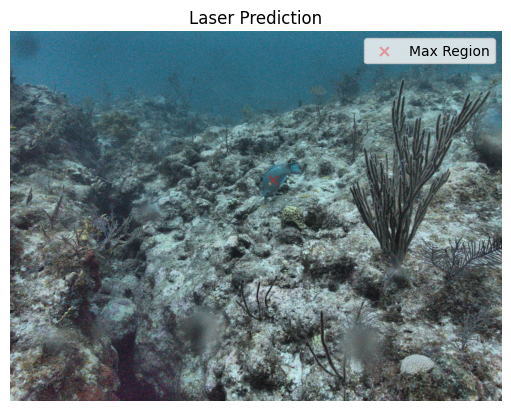

In [ ]:
# Overlay laser onto original image
image = cv2.imread('dataset/data/0a1ac207c02f37bbf6f4aaa8e53fb6d7.JPG', cv2.IMREAD_COLOR_BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.title("Laser Prediction")
plt.imshow(image)
plt.scatter(max_loc[0], max_loc[1], c='red', s=40, marker='x', label="Max Region", alpha=0.33)
plt.legend()
plt.axis("off")

plt.show()

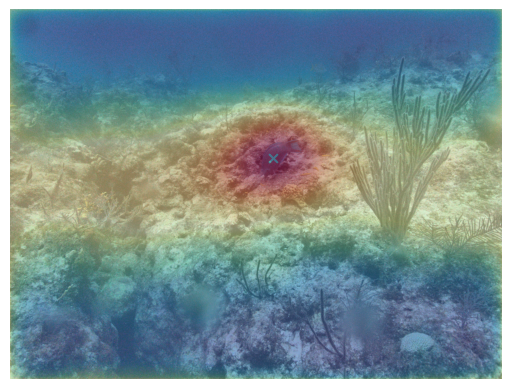

In [ ]:
# Ovelay heatmap and laser location onto original image
img_path = 'dataset/data/0a1ac207c02f37bbf6f4aaa8e53fb6d7.JPG'
heat_path = 'pres/0a1ac207c02f37bbf6f4aaa8e53fb6d7.png'

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
heat = cv2.imread(heat_path)
heat = cv2.cvtColor(heat, cv2.COLOR_BGR2RGB) / 255.0

plt.imshow(image)
plt.imshow(heat, alpha=0.5)
plt.scatter(max_loc[0], max_loc[1], c='cyan', s=40, marker='x', label="Max Region", alpha=0.33)
# plt.title("Heatmap Overlay")
plt.axis('off')

plt.show()

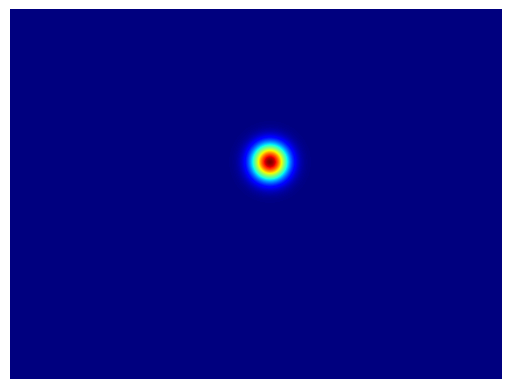

In [19]:
# Visualize training heatmap
H, W = 3016, 4014

# Laser location
x0, y0 = 2121, 1246

# Gaussian parameters
sigma = 100

# Create coordinate grids
y = np.arange(H)[:, None]
x = np.arange(W)[None, :]

# Gaussian formula
zeros = np.exp(-((x - x0)**2 + (y - y0)**2) / (2*sigma**2))

# Normalize
zeros /= zeros.max()

# Display
plt.imshow(zeros, cmap='jet')


plt.axis('off')
plt.show()

In [20]:
# Distance calculation
print(distance(max_loc[0], max_loc[1], 2121, 1246))

38.600518131237564
